# What is Machine Learning??

**_Academic Definition:_** Machine Learning is about building programs with **tunable parameters** (typically an array of floating point values) that are adjusted automatically so as to improve their behavior by **adapting to previously seen data.**

Machine Learning can be considered a subfield of **Artificial Intelligence** since those algorithms can be seen as building blocks to make computers learn to behave more intelligently by somehow **generalizing** rather that just storing and retrieving data items like a database system would do.

**_My Definition: machine learning is the science  (and art) of programming computers so they can learn from data_** 

>“A computer program is said to learn from experience E with respect to some task T and some performance measure P, if its performance on T, as measured by P, improves with experience E.” -- Tom Mitchell, Carnegie Mellon University

#### Spam vs Ham Example

* T = Flag spam for new emails
* E = Training email data set
* P = Ratio of correctly flagged emails

---

## Computer Science Approach VS Machine Learning Approach

![alt text][csalg]

[csalg]: https://www.safaribooksonline.com/library/view/hands-on-machine-learning/9781491962282/assets/mlst_0101.png "Figure 1.1"

*Computer Science Algorithm Approach*

![alt text][mlalg]

[mlalg]: https://www.safaribooksonline.com/library/view/hands-on-machine-learning/9781491962282/assets/mlst_0102.png "Figure 1.2"

*Machine Learning Approach*

![alt text][mlupdate]

[mlupdate]: https://www.safaribooksonline.com/library/view/hands-on-machine-learning/9781491962282/assets/mlst_0103.png "Figure 1.3"

*Machine Learning Has Ability to Update*

---

## Machine Learning Landscape

![alt text][mlemojis]

[mlemojis]: https://static1.squarespace.com/static/57293859b09f959325ac2e33/t/574cc10db654f95fce4cda28/1464650023923/ "Figure 1.4"

*Machine Learning with Emojis by **Emily Barry***

---

### 3 Key Questions When Looking at ML Models

#### 1. Training Relative to Human Supervision
* Supervised
* Unsupervise
* Semisupervised
* Reinforcment

#### 2. Learning Incrementation
* Online
* Batch

#### 3. Learning Generalization
* Instance Based Learning
* Model Based Learning

---

## Different Types of Machine Learning

### 1. Supervised Machine Learning ( Linear Models, Nearest Neighbor, Neural Networks & etc. )

> **The system has a teacher** in the form of labeled data that pairs an input with a desired output

### 2. Unsupervised Machine Learning ( Clustering, Neural Networks, & etc. )

> **The system has no teacher** or labeled data but it can still group the class into correlated parts using their features

### 3. Semisupervised Machine Learning ( Label Propogation like Photo Recognition )

> **The system has a tenured professor** that might not always be in class but when present is very effective

### 4. Reinforcment Machine Learning ( Alpha Go and game training )

> **Classroom defines the learning policy** through postivie/negative rewards of students actions

[![IMAGE ALT TEXT HERE](http://www.bestoldgames.net/img/ss/super-mario-bros/super-mario-bros-ss1.png)](https://youtu.be/qv6UVOQ0F44?t=45s)

---

## Ways Machines Learn ( One Time vs On the Fly )

### 1. Batch Learning

- Incapable of learning incrementally because must be trained w/ all available data
- Entire system is replaced on each iteration
- Fundamentally expensive as all data must be stored

### 2. Incremental Learning

- Learns from additional data instances
- System has versions and is updated
- Less expensive because data isn't needed again once it is in the learning set

---

## Ways to Predict the Unknown ( Instance Based vs Model Based )

### 1. Instance Based Learning

> **Learning by heart** or using rules to predict an unknown value or it's classification

### 2. Model Based Learning

> **Learning by observing** and using a defined model to predict an unknown value or it's classification

---

# Generalization and Validation

## Possible Model Challenges of Generalization ( Bad Model or Bad Data )

### 1. Bad Model

> Performs well on training data set but doesn't accurately predict unknown values

### 2. Bad Data

> Data does not accurately represent unknown population

---

## Hobby Botany

*Data Scientists all start out as hobby botanists because the most popularized data set is the open iris data set.*

![alt text][sepalpetal]

[sepalpetal]: https://keyassets.timeincuk.net/inspirewp/live/wp-content/uploads/sites/8/2015/02/Iris-2.jpg "Figure 1.4"

*Petal is inner part and Sepal is outter part*

In [1]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()
print("Types of iris: {}".format(iris_dataset['target_names']))

Types of iris: ['setosa' 'versicolor' 'virginica']


In [2]:
print("Feature names: \n{}".format(iris_dataset['feature_names']))

Feature names: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [3]:
print("Sample Data:\n{}".format(iris_dataset['data'][:5]))

Sample Data:
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]


---

## Train / Test Data Split

You don't want to use the same data to test a model that you used to train it because that introduces bias.

Enter the concept of splitting the data into a training set and a testing set
   * Debates exist on the right split for training/testing (scikit-learn uses 75%/25%)
   * Data is typically denoted as **X** while labels are denoted with **y**

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (112, 4)
y_train shape: (112,)
X_test shape: (38, 4)
y_test shape: (38,)


---

# Model Examples

*The fit method in scikit-learn model return a self object so chaining is common*

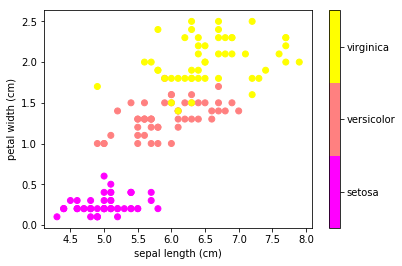

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
iris = load_iris()

x_index = 0
y_index = 3

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.scatter(iris.data[:, x_index], iris.data[:, y_index],
            c=iris.target, cmap=plt.cm.get_cmap('spring', 3))
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.clim(-0.5, 2.5)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index]);

In [6]:
from sklearn import neighbors, datasets

iris = datasets.load_iris()
X, y = iris.data, iris.target

knn = neighbors.KNeighborsClassifier(n_neighbors=3)

knn.fit(X, y)

# What kind of iris has 3cm x 5cm sepal and 4cm x 2cm petal?
result = knn.predict([[3, 5, 4, 2],])

knn.predict_proba([[3, 5, 4, 2],])

array([[ 0.        ,  0.66666667,  0.33333333]])

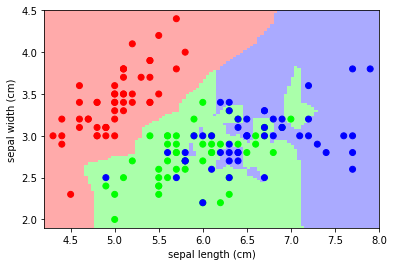

In [7]:
%matplotlib inline
from sklearn import neighbors, datasets, linear_model
import pylab as pl
import numpy as np
from matplotlib.colors import ListedColormap

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

def plot_iris_knn():
    iris = datasets.load_iris()
    X = iris.data[:, :2] 
    y = iris.target

    knn = neighbors.KNeighborsClassifier(n_neighbors=2)
    knn.fit(X, y)

    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    pl.figure()
    pl.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    pl.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    pl.xlabel('sepal length (cm)')
    pl.ylabel('sepal width (cm)')
    pl.axis('tight')
    
plot_iris_knn()

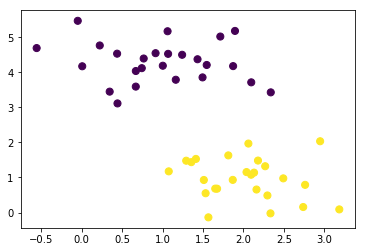

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs

X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap = 'viridis');

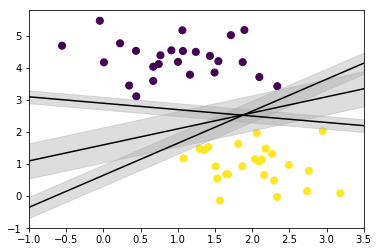

In [9]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);